In [34]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


Source of dataset: Data set is for "Traffic Flow Forecasting Data Set" : Abstract: The task for this dataset is to forecast the spatio-temporal traffic volume based on the historical traffic volume and other features in neighboring locations.

**Abdulwahed Salam, Abdelaaziz El Hibaoui**
Faculty of Sciences
Tetouan, Morocco
Abdelmalek Essaadi University 

https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#

In [4]:
# Read the dataset into a DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'
df = pd.read_csv(url, encoding='latin-1')

# Data set is for "Traffic Flow Forecasting Data Set" : Abstract: The task for this dataset is to forecast the spatio-temporal traffic volume based on the historical traffic volume and other features in neighboring locations.




In [5]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [6]:
df.size

471744

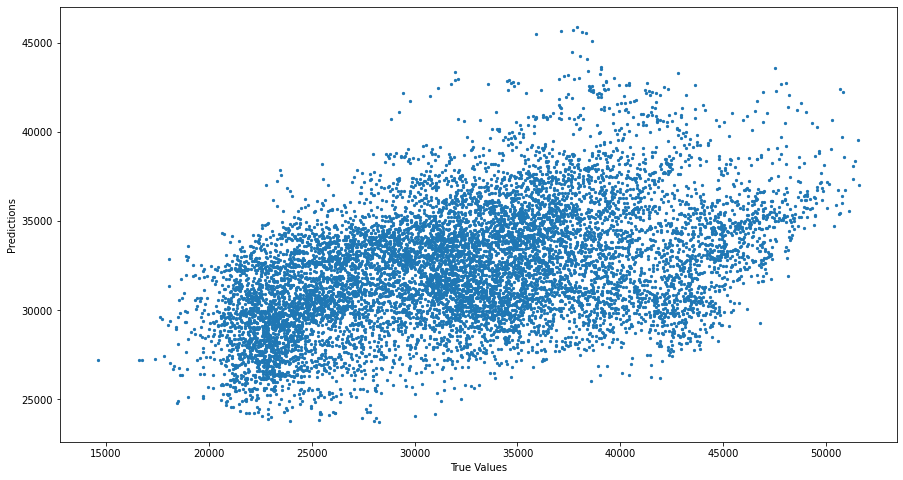

In [78]:
import mpld3

# Select the features and target variable
X = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y = df['Zone 1 Power Consumption']

# Set the size of the figure
plt.figure(figsize=(15, 8))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Visualize the results using a scatter plot
plt.scatter(y_test, y_pred, s=5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [51]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

# Relationships between variables in our dataset:

To find some relationship between the wind speed, temperature, humidity, and power consumption in our dataset, see the process below:

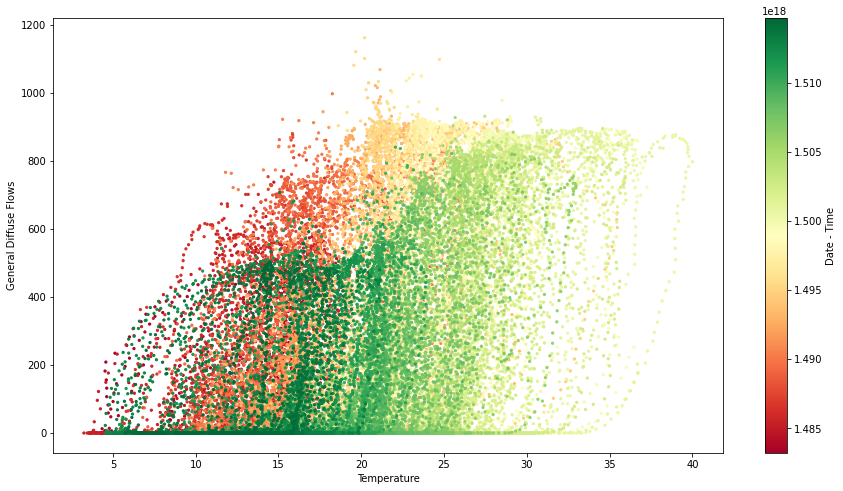

In [73]:
# Convert the DateTime column to a datetime column
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Select the temperature, general diffuse flows, and DateTime columns
x = df['Temperature']
y = df['general diffuse flows']
z = df['DateTime']

# Set the size of the figure
plt.figure(figsize=(15, 8))

# Create a scatter plot using Matplotlib
scatter = plt.scatter(x, y, c=z, cmap='RdYlGn', s=5)

# Add a colorbar to the plot
colorbar = plt.colorbar(scatter)

# Label the axis
plt.xlabel('Temperature')
plt.ylabel('General Diffuse Flows')

# Label the colorbar
colorbar.set_label('Date - Time')

# Show the plot
plt.show()

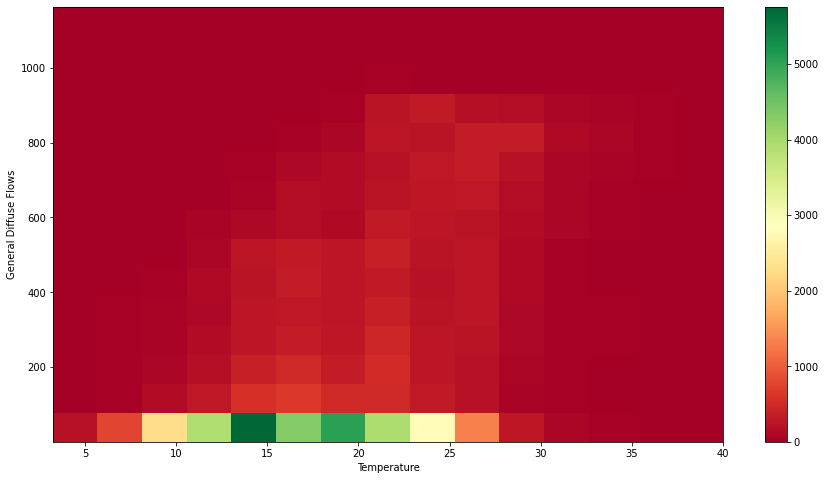

In [68]:
# Select the temperature and general diffuse flows columns
x = df['Temperature']
y = df['general diffuse flows']

# Set the size of the figure
plt.figure(figsize=(15, 8))

# Create a density plot using Matplotlib
plt.hist2d(x, y, cmap='RdYlGn', bins=15)

# Add a colorbar to the plot
plt.colorbar()

# Label the axis
plt.xlabel('Temperature')
plt.ylabel('General Diffuse Flows')

# Show the plot
plt.show()

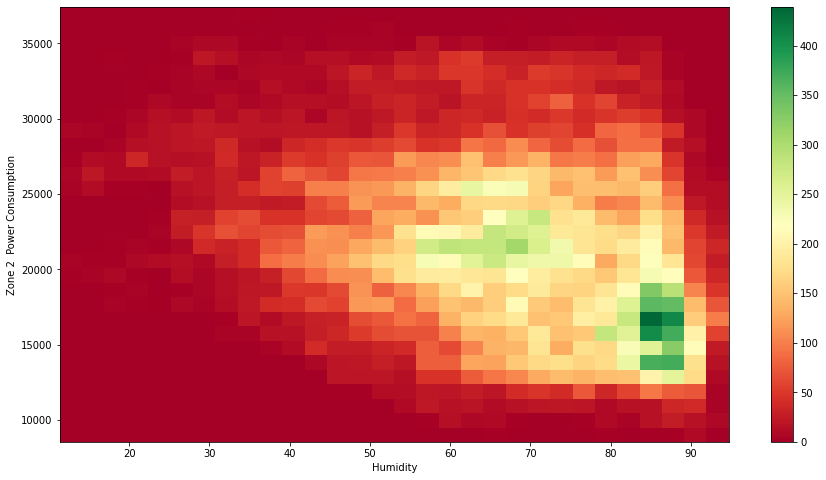

In [66]:
# Select the temperature and general diffuse flows columns
x = df['Humidity']
y = df['Zone 2  Power Consumption']

# Set the size of the figure
plt.figure(figsize=(15, 8))

# Create a density plot using Matplotlib
plt.hist2d(x, y, cmap='RdYlGn', bins=30)

# Add a colorbar to the plot
plt.colorbar()

# Label the axis
plt.xlabel('Humidity')
plt.ylabel('Zone 2  Power Consumption')

# Show the plot
plt.show()

The color map used in a plot specifies the range of colors used to represent the data in the plot. In a diverging color map like 'RdYlGn', the colors change from red to yellow to green, with white in the middle representing the center or baseline value of the data.

In a density plot like the one you created, the colors represent the density or frequency of the data at each point in the plot. The darker the color, the higher the density of the data. The lighter the color, the lower the density of the data.

To interpret the colors in the plot, you can use the colorbar to see the range of values represented by each color. The colorbar is a scale that shows the range of values represented by the colors in the plot, with the colors on the left representing the lowest values and the colors on the right representing the highest values.

For example, in the density plot you created, if the colorbar shows that the lowest values are represented by red colors and the highest values are represented by green colors, you can interpret the plot as follows:

    If a point in the plot is red, it means that the data at that point has a low density or frequency.
    If a point in the plot is yellow, it means that the data at that point has a medium density or frequency.
    If a point in the plot is green, it means that the data at that point has a high density or frequency.

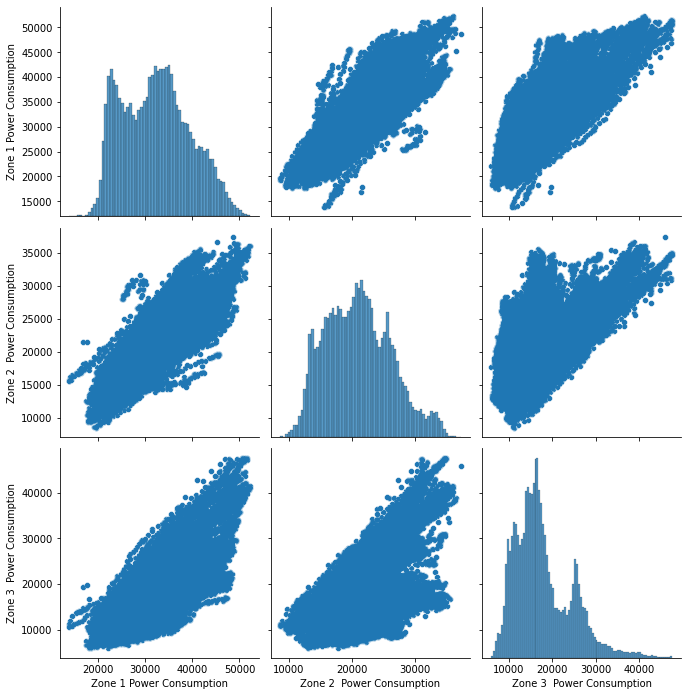

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select the power consumption columns
power_consumption = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

# Create a pairplot using Seaborn
g = sns.pairplot(power_consumption)

# Reduce the dot sizes in the scatterplots
g.map_offdiag(plt.scatter, s=10)

# Increase the size of the graph
plt.gcf().set_size_inches(10, 10)

# Show the plot
plt.show()

In [46]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

To evaluate the performance of our linear regression model on test data, we use the mean squared error (MSE) and the R-squared (R2) metrics.

The MSE is a measure of the average squared difference between the predicted values and the true values. It is calculated as the sum of the squared differences between the predicted values and the true values, divided by the number of samples. A lower MSE indicates a better fit of the model to the data.

The R2 is a measure of the goodness of fit of the model to the data. It is calculated as the squared correlation between the predicted values and the true values. An R2 value of 1 indicates a perfect fit of the model to the data, and an R2 value of 0 indicates a poor fit of the model to the data.

To calculate our MSE and R2 for a linear regression model in Python, we can use the mean_squared_error() and r2_score() functions from the sklearn.metrics module. Here is an example of how we could use these functions to evaluate the performance of our linear regression model on test data:

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2
r2 = r2_score(y_test, y_pred)


# Print the results
print('MSE:', mse)


# Print the results
print('R2:', r2)





MSE: 40217776.50879474
R2: 0.21347921492697763


In general, the MSE is considered to be too high if it is significantly larger than the variance of the true values. 

This would indicate that our model is not fitting the data well, and the predictions are far off from the true values.

To determine whether the MSE value above is too high, we will compare it to the variance of the true values. If the MSE is significantly larger than the variance, then the model is not fitting the data well. See the code below comparing variance using our target variable "Zone 1 power consumption".

In [57]:

# Select the power consumption in Zone 1 column as the target variable
y = df['Zone 1 Power Consumption']

# Calculate the variance of the true values
variance = y.var()

# Print the variance
print(variance)

50844922.481950335


---

- Our variance is 50.8 million
- Our MSE is 40.2 million.

---

Difference is about 10.6 million

In [59]:
print(variance - mse)

10627145.973155595


So, since our variance is larger than our MSE, this indicates that the model is fitting the data well! 😂

It is worth noting that there is no specific threshold for the MSE or the variance that determines whether a model is fitting the data well. The appropriate threshold will depend on the specific context and the goals of the analysis. However, in general, a lower MSE and a larger variance are both indicative of a better fit of the model to the data.

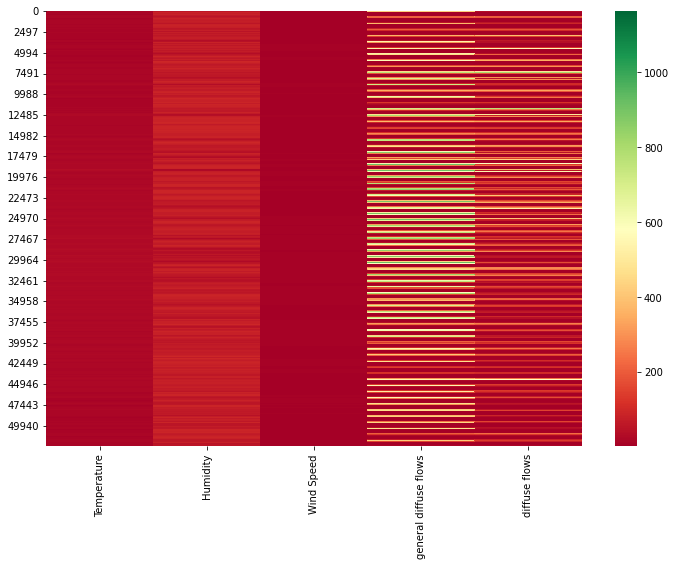

In [67]:
# Select the columns to include in the heatmap
columns = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']

# Create a heatmap using Seaborn
ax = sns.heatmap(df[columns], cmap='RdYlGn')

# Set the size of the heatmap
ax.figure.set_size_inches(12, 8)

# Show the plot
plt.show()


Below is an example of how we can use the scikit-learn library to perform linear regression on the Temperature, Humidity, and Wind Speed columns of the dataset csv provided ⬇

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select the temperature, humidity, and wind speed columns
X = df[['Temperature', 'Humidity', 'Wind Speed']]

# Select the zone 1 power consumption column as the target variable
y = df['Zone 1 Power Consumption']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the power consumption for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance on the test data using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Evaluate the model's performance on the test data using R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 40870433.94
R-squared: 0.20


We will now use the results and code from the linear regression model above to make predictions on our new data from the same CSV dataset, by using the predict() method of the trained model.

Below, we can use the trained model to make predictions on any new data from the dataset:

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the temperature, humidity, and wind speed columns
X = df[['Temperature', 'Humidity', 'Wind Speed']]

# Select the zone 1 power consumption column as the target variable
y = df['Zone 1 Power Consumption']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the power consumption for new data using the trained model
new_data = [[10, 50, 5]]  # Example new data, where 10 is Temperature, 50 is Humidity and WInd is 5
    #new_data = [[10, 50, 5], [15, 60, 10], [20, 70, 15]]  # Example multiple new data
# Add column names to the new data
columns = ['Temperature', 'Humidity', 'Wind Speed']
new_data = pd.DataFrame(new_data, columns=columns)


In [19]:
y_pred = model.predict(new_data)
print("Predicted Zone 1 Power Consumption is: ", y_pred)

Predicted Zone 1 Power Consumption is:  [28372.12317711]


In [28]:
# Predict the power consumption for new data using several valuess in the trained model
 # Example new data, where 10,50,5 are Temperature, 15,60,10 are Humidity and WInd are 20,70,15
new_data = [[40, 30, 35], [60, 80, 75], [20, 70, 15]]  # Example multiple new data
# Add column names to the new data
columns = ['Temperature', 'Humidity', 'Wind Speed']
new_data = pd.DataFrame(new_data, columns=columns)

In [29]:
y_pred = model.predict(new_data)
print("Given the multiple values of Temperature, Humidity and Wind,")
print("Predicted Zone 1 Power Consumption values will be: ", y_pred)

Given the multiple values of Temperature, Humidity and Wind,
Predicted Zone 1 Power Consumption values will be:  [40657.03420881 43211.05055935 31182.02251342]


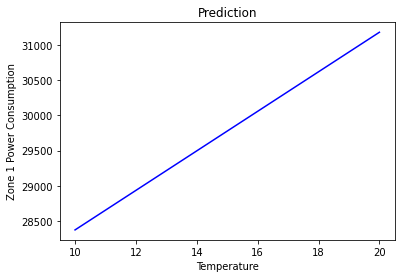

In [27]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = [10, 15, 20] # Here this is Temperatures (10), (15), (20)

# Plot the prediction on the y-axis
plt.plot(x, y_pred, 'b-')

# Add a title and axis labels
plt.title('Prediction')
plt.xlabel('Temperature')
plt.ylabel('Zone 1 Power Consumption')

# Show the plot
plt.show()